In [1]:

import numpy as np
import pandas as pd

from src import ImageQuant2, load_image, raw_data_path

%matplotlib widget

In [2]:
# Import quantification model
membg = np.loadtxt("../../data/calibration_mem6.txt")
cytbg = np.loadtxt("../../data/calibration_cyt.txt")
calibration_factor = np.loadtxt("../../data/calibration_constants.txt")[6]

In [3]:
# Import embryos dataframe
df = pd.read_csv("../../data/ph_embryos.csv")
df["Path"] = df["Path"].apply(lambda x: raw_data_path + x)

### Quantify

  0%|                                                                                                                                                         | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                                | 1/600 [00:00<07:21,  1.36it/s]

  1%|█▍                                                                                                                                               | 6/600 [00:00<01:04,  9.17it/s]

  2%|██▉                                                                                                                                             | 12/600 [00:00<00:32, 18.07it/s]

  3%|████▎                                                                                                                                           | 18/600 [00:01<00:22, 25.92it/s]

  4%|█████▊                                                                                                                                          | 24/600 [00:01<00:17, 32.50it/s]

  5%|██████▉                                                                                                                                         | 29/600 [00:01<00:15, 36.58it/s]

  6%|████████▍                                                                                                                                       | 35/600 [00:01<00:13, 41.16it/s]

  7%|█████████▊                                                                                                                                      | 41/600 [00:01<00:12, 44.71it/s]

  8%|███████████▎                                                                                                                                    | 47/600 [00:01<00:11, 47.39it/s]

  9%|████████████▋                                                                                                                                   | 53/600 [00:01<00:10, 49.82it/s]

 10%|██████████████▏                                                                                                                                 | 59/600 [00:01<00:10, 49.92it/s]

 11%|███████████████▌                                                                                                                                | 65/600 [00:01<00:10, 50.63it/s]

 12%|█████████████████                                                                                                                               | 71/600 [00:02<00:10, 51.50it/s]

 13%|██████████████████▍                                                                                                                             | 77/600 [00:02<00:09, 53.57it/s]

 14%|███████████████████▉                                                                                                                            | 83/600 [00:02<00:09, 54.80it/s]

 15%|█████████████████████▎                                                                                                                          | 89/600 [00:02<00:09, 55.08it/s]

 16%|██████████████████████▊                                                                                                                         | 95/600 [00:02<00:09, 53.93it/s]

 17%|████████████████████████                                                                                                                       | 101/600 [00:02<00:09, 54.58it/s]

 18%|█████████████████████████▋                                                                                                                     | 108/600 [00:02<00:08, 57.71it/s]

 19%|███████████████████████████▍                                                                                                                   | 115/600 [00:02<00:08, 59.83it/s]

 20%|█████████████████████████████                                                                                                                  | 122/600 [00:02<00:07, 60.01it/s]

 22%|██████████████████████████████▋                                                                                                                | 129/600 [00:03<00:07, 59.31it/s]

 22%|████████████████████████████████▏                                                                                                              | 135/600 [00:03<00:07, 59.07it/s]

 24%|█████████████████████████████████▊                                                                                                             | 142/600 [00:03<00:07, 58.93it/s]

 25%|███████████████████████████████████▎                                                                                                           | 148/600 [00:03<00:07, 56.60it/s]

 26%|████████████████████████████████████▋                                                                                                          | 154/600 [00:03<00:08, 55.04it/s]

 27%|██████████████████████████████████████▏                                                                                                        | 160/600 [00:03<00:07, 55.00it/s]

 28%|███████████████████████████████████████▌                                                                                                       | 166/600 [00:03<00:08, 51.94it/s]

 29%|████████████████████████████████████████▉                                                                                                      | 172/600 [00:03<00:08, 52.82it/s]

 30%|██████████████████████████████████████████▍                                                                                                    | 178/600 [00:03<00:07, 54.64it/s]

 31%|███████████████████████████████████████████▊                                                                                                   | 184/600 [00:04<00:07, 55.64it/s]

 32%|█████████████████████████████████████████████▌                                                                                                 | 191/600 [00:04<00:07, 57.85it/s]

 33%|███████████████████████████████████████████████▏                                                                                               | 198/600 [00:04<00:06, 59.19it/s]

 34%|████████████████████████████████████████████████▊                                                                                              | 205/600 [00:04<00:06, 59.80it/s]

 35%|██████████████████████████████████████████████████▌                                                                                            | 212/600 [00:04<00:06, 61.26it/s]

 36%|████████████████████████████████████████████████████▏                                                                                          | 219/600 [00:04<00:06, 61.96it/s]

 38%|█████████████████████████████████████████████████████▊                                                                                         | 226/600 [00:04<00:06, 61.97it/s]

 39%|███████████████████████████████████████████████████████▌                                                                                       | 233/600 [00:04<00:05, 61.87it/s]

 40%|█████████████████████████████████████████████████████████▏                                                                                     | 240/600 [00:04<00:05, 62.05it/s]

 41%|██████████████████████████████████████████████████████████▊                                                                                    | 247/600 [00:05<00:05, 62.95it/s]

 42%|████████████████████████████████████████████████████████████▌                                                                                  | 254/600 [00:05<00:05, 62.37it/s]

 44%|██████████████████████████████████████████████████████████████▏                                                                                | 261/600 [00:05<00:05, 62.00it/s]

 45%|███████████████████████████████████████████████████████████████▊                                                                               | 268/600 [00:05<00:05, 61.30it/s]

 46%|█████████████████████████████████████████████████████████████████▌                                                                             | 275/600 [00:05<00:05, 60.85it/s]

 47%|███████████████████████████████████████████████████████████████████▏                                                                           | 282/600 [00:05<00:05, 60.65it/s]

 48%|████████████████████████████████████████████████████████████████████▉                                                                          | 289/600 [00:05<00:05, 60.22it/s]

 49%|██████████████████████████████████████████████████████████████████████▌                                                                        | 296/600 [00:05<00:05, 60.13it/s]

 50%|████████████████████████████████████████████████████████████████████████▏                                                                      | 303/600 [00:06<00:04, 59.59it/s]

 52%|█████████████████████████████████████████████████████████████████████████▋                                                                     | 309/600 [00:06<00:04, 59.09it/s]

 52%|███████████████████████████████████████████████████████████████████████████                                                                    | 315/600 [00:06<00:04, 58.63it/s]

 54%|████████████████████████████████████████████████████████████████████████████▌                                                                  | 321/600 [00:06<00:04, 56.95it/s]

 55%|██████████████████████████████████████████████████████████████████████████████▏                                                                | 328/600 [00:06<00:04, 58.48it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▊                                                               | 335/600 [00:06<00:04, 59.87it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████▎                                                             | 341/600 [00:06<00:04, 59.74it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▋                                                            | 347/600 [00:06<00:04, 59.42it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████▎                                                          | 354/600 [00:06<00:04, 59.88it/s]

 60%|██████████████████████████████████████████████████████████████████████████████████████                                                         | 361/600 [00:06<00:03, 60.16it/s]

 61%|███████████████████████████████████████████████████████████████████████████████████████▋                                                       | 368/600 [00:07<00:03, 60.23it/s]

 62%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 375/600 [00:07<00:03, 59.62it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 381/600 [00:07<00:04, 52.94it/s]

 64%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 387/600 [00:07<00:05, 42.50it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 392/600 [00:07<00:05, 37.30it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 397/600 [00:07<00:05, 38.27it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 402/600 [00:08<00:05, 39.44it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████                                              | 407/600 [00:08<00:04, 40.70it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 412/600 [00:08<00:05, 36.69it/s]

 69%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 416/600 [00:08<00:06, 30.64it/s]

 70%|████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 420/600 [00:08<00:05, 32.07it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 425/600 [00:08<00:04, 35.44it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 430/600 [00:08<00:04, 37.64it/s]

 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 435/600 [00:08<00:04, 39.93it/s]

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 440/600 [00:09<00:03, 41.66it/s]

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 445/600 [00:09<00:03, 43.59it/s]

 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 450/600 [00:09<00:03, 44.72it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 456/600 [00:09<00:03, 47.39it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 461/600 [00:09<00:02, 47.66it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 466/600 [00:09<00:02, 47.39it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 471/600 [00:09<00:02, 46.09it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 476/600 [00:09<00:02, 42.35it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 481/600 [00:09<00:02, 42.78it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 487/600 [00:10<00:02, 46.13it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 494/600 [00:10<00:02, 50.41it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 500/600 [00:10<00:02, 48.44it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 505/600 [00:10<00:02, 47.16it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 510/600 [00:10<00:01, 46.24it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 515/600 [00:10<00:01, 46.85it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 520/600 [00:10<00:01, 46.73it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 525/600 [00:10<00:01, 46.68it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 530/600 [00:10<00:01, 46.43it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 535/600 [00:11<00:01, 47.35it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 541/600 [00:11<00:01, 48.28it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 546/600 [00:11<00:01, 48.00it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 551/600 [00:11<00:01, 47.59it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 556/600 [00:11<00:00, 47.97it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 561/600 [00:11<00:00, 48.25it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 567/600 [00:11<00:00, 49.52it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 573/600 [00:11<00:00, 51.35it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 579/600 [00:11<00:00, 51.50it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 585/600 [00:12<00:00, 52.77it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 591/600 [00:12<00:00, 51.48it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 597/600 [00:12<00:00, 50.89it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:12<00:00, 48.62it/s]

{1565367567, 1556902036, 1565359132, 1556901937, 1565357105, 1556902453, 1565360309, 1565359415, 1565359289, 1556902969, 1565360954, 1565360828, 1565356990, 1565366847, 1565360705, 1565356740, 1565359558, 1565356359, 1565360584, 1559137737, 1565359689, 1565367111, 1565360221, 1565358687, 1559137889, 1565357282, 1565356899, 1565358564, 1556901861, 1565367659, 1565367278, 1565367023}
{1565367567, 1556902036, 1565359132, 1556901937, 1565357105, 1556902453, 1565360309, 1565359415, 1565359289, 1556902969, 1565360954, 1565360828, 1565356990, 1565366847, 1565360705, 1565356740, 1565359558, 1565356359, 1565360584, 1559137737, 1565359689, 1565367111, 1565360221, 1565358687, 1559137889, 1565357282, 1565356899, 1565358564, 1556901861, 1565367659, 1565367278, 1565367023}


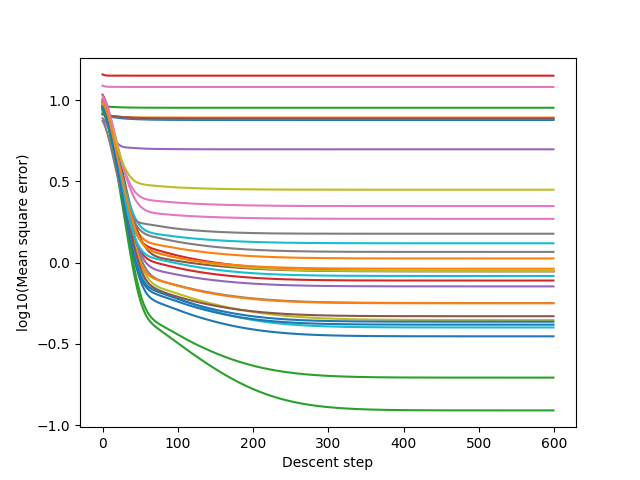

In [4]:
# Import data
paths = df.Path.to_list()
imgs = [load_image(p + "/af_corrected.tif") for p in paths]
rois = [np.loadtxt(p + "/ROI_fit.txt") for p in paths]

# Run quantification
iq = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg)
iq.quantify()

# Plot loss curve
iq.plot_losses(log=True)

# Save results
print(set(df.EmbryoID))
res = iq.compile_res(ids=[str(x) for x in df["EmbryoID"].to_list()])
print(set(res.EmbryoID))
res["Membrane signal"] *= calibration_factor
res.to_csv("../../data/ph_quantification.csv")